# GEOG 497 - Spring 2021 - Cryosphere & Climate Systems
### A3: Föhn winds driving Larsen C melt

### Code to create RACMO2.3p2 5.5km SEB plots over the Antarctic Peninsula

Input data: 3-hourly 5.5km RACMO2.3p2 for the AP
* Source: https://zenodo.org/record/3677642#.YD_nEZNKhBw

You will need to specify:
* Start and end dates/times over which the mean of a variable of interest will be calculated
* Variable & input file names
* Plot titles, min/max values, and contour interval

Output:
* Plot of the RACMO2.3p2 variable averaged over the given time period. 

### Run the following code block first:

In [2]:
# import python packages that allow for data reading, analysis, and plotting
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cartopy.crs as ccrs
import cartopy.feature as cfe

**These are the available hourly RACMO2.3p2 data to plot**

In the code block below that does the plotting, you will need to specify the filename and variable name for one of these fields. 

| Variable type   | Units  | Filename | Variable name | 
|-----------------|--------|----------|---------------|
| 10-m wind speed | m/s | ff10m.KNMI-2011.XPEN055.ERAINx_RACMO2.4.3H.nc_201605.nc | ff10m |
| Latent heat flux | W/m2 | latf.KNMI-2011.XPEN055.ERAINx_RACMO2.4.3H.nc_201605.nc  | latf |
| Net longwave radiation | W/m2 | lwsn.KNMI-2011.XPEN055.ERAINx_RACMO2.4.3H.nc_201605.nc  | lwsn  |
| Total precipitative flux | kg/m2/s | precip.KNMI-2011.XPEN055.ERAINx_RACMO2.4.3H.nc_201605.nc | precip |
| 2-m relative humidity | % | rh2m.KNMI-2011.XPEN055.ERAINx_RACMO2.4.3H.nc_201605.nc | rh2m |
| Sensible heat flux | W/m2 | senf.KNMI-2011.XPEN055.ERAINx_RACMO2.4.3H.nc_201605.nc | senf |
| Net shortwave radiation | W/m2 | swsn.KNMI-2011.XPEN055.ERAINx_RACMO2.4.3H.nc_201605.nc  | swsn |
| 2-m air temperature | K | t2m.KNMI-2011.XPEN055.ERAINx_RACMO2.4.3H.nc_201605.nc | t2m |
| Surface (skin) temperature | K | tskin.KNMI-2011.XPEN055.ERAINx_RACMO2.4.3H.nc_201605.nc | tskin |

Advice:
* Keep in mind the units. What ranges should we expect for a particular variable?
* If you are plotting an SEB term (esp. SHF, LHF), recall that these can be positive or negative. Thus, setting minimum and maximum plot values so that zero is in the middle is ideal.
* If you are plotting t2m or skin temperature, it may be useful to subtract 273.15 to the variable to convert from K to C (thus allowing you to easily see where the 0°C contour is!). You can do this by adding `data = data-273.15` after the data variable is defined in the code. 

### In the following code block, you will set the time period of interest. After editing, be sure to run. 

In [4]:
# [-------- EDIT THIS SECTION --------]
# define the time perid of interest (the major fohn event id'ed using FöhnDA method at AWS18)
# Values need to be in a specific format, like: 2021-03-02T13:00 [YYYY-MM-DDTHH:MM]
starttime = '2016-05-25T09:00'
endtime = '2016-05-27T10:00'

### Below is the code that creates a plot using the parameters you specify at the top of the block. 

Once you get your first plot the way you like it, you can copy and paste the code below into a new block and edit it slightly to plot a different variable. 

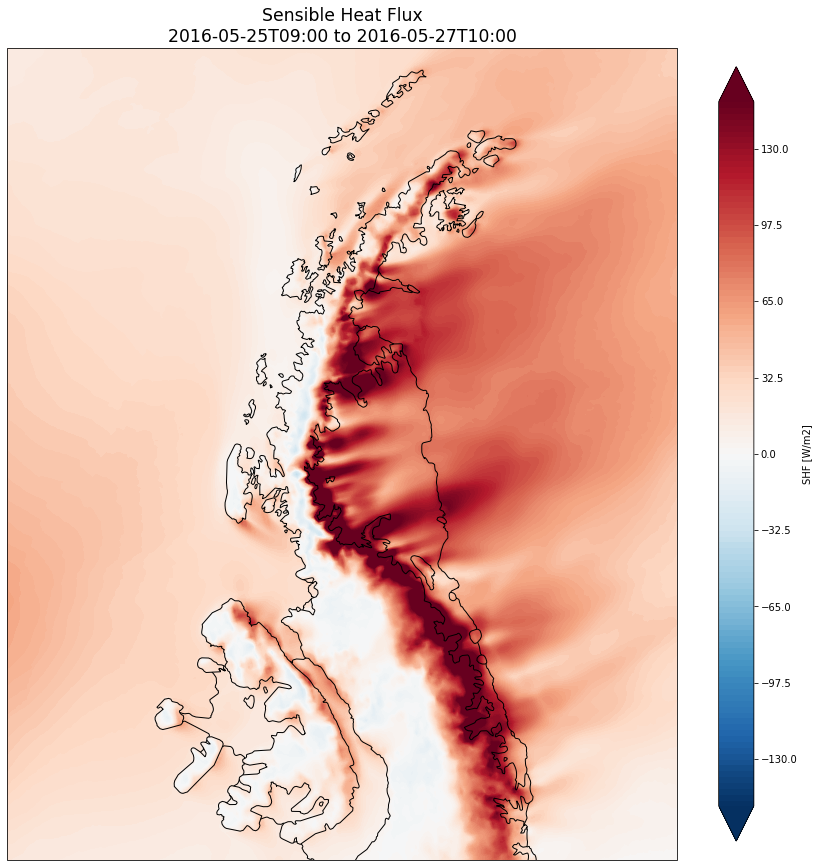

In [8]:
# [-------- EDIT THIS SECTION --------]
# Set the appropriate data file name and variable name using the above reference
data_file_name = 'senf.KNMI-2011.XPEN055.ERAINx_RACMO2.4.3H.nc_201605.nc'
variable_name = 'senf'

# set the plot and colorbar titles
plot_title = 'Sensible Heat Flux'
colorbar_label = 'SHF [W/m2]'

# set the min and max values of your plot, as well as the contour interval
# experiment with these to get a good looking plot
# these are numerical values not in quotes
min_plot_value = -150 
max_plot_value = 150
contour_interval = 2.5

# choose a color map from https://matplotlib.org/stable/tutorials/colors/colormaps.html
# ** for LHF/SHF terms use a diverging color map and set the min/max values so that 0 is in the middle (i.e., a neutral color) **
# ** for these, I recommend RdBu, but reversed so that positive (warming) fluxes are red and negative (cooling) fluxes are blue **
colormap_name = 'RdBu'
reverse_colormap = True # True or False (must be capitalized and not in quotes)

# [-------- GENERALLY NO NEED TO EDIT BELOW--------]

# Read NetCDF, select variable, and take temporal mean over time of interest 
dataFolder = './Data/'
ds = xr.open_dataset(dataFolder + data_file_name)
var = ds[variable_name].squeeze() # squeeze gets rid of unncessary single-dimension coordinates (here: height)
data = var.sel(time=slice(starttime, endtime)).mean('time') # select the variable from the dataset over just the interval of interest, then take mean over the time dimension

# add a line here to scale the data field in some way (e.g., to convert units), e.g.,:
# data = data * 60 * 60 * 3 # [convert kg m-2 s-1 to kg m-2 hr-1]

# Set up a plot: size, projection, and geographic extent. 
plt.figure(figsize=(15,15))
ax = plt.subplot(projection=ccrs.Stereographic(central_longitude=-45, central_latitude=-75))
ax.set_extent([-72,-52,-73,-62], ccrs.PlateCarree())

# This is some extra code that deals with rotated pole projection of RACMO
# Defines a Cartopy coordinate reference system for the data 
rlon = ds.rlon.values
rlat = ds.rlat.values
racmoCRS = ccrs.RotatedPole(pole_longitude=ds.rotated_pole.grid_north_pole_longitude,
                            pole_latitude=ds.rotated_pole.grid_north_pole_latitude)

# This will set the minimum and maximum values on your plot: min, max, contour interval
clevs = np.arange(min_plot_value,max_plot_value+1,contour_interval)

# deal with colormap reversal, if set to True
if reverse_colormap:
    colormap_name = colormap_name + '_r' 
    
# Plot data 
result = ax.contourf(rlon, rlat, data, clevs, extend='both', cmap=colormap_name, transform=racmoCRS)

# add coastlines 
ax.coastlines(resolution='10m')
ax.add_feature(cfe.NaturalEarthFeature('physical', 'antarctic_ice_shelves_lines', '10m', edgecolor='k', facecolor='none'))

# This sets the colorbar info. Set the label here appropriate to the variable you're plotting.
plt.colorbar(result, orientation='vertical', label=colorbar_label, shrink=0.95, pad=0.05)

# This sets the title of the plot.
ax.set_title(plot_title + '\n' + starttime + ' to ' + endtime, size='xx-large')

# show the plot
plt.savefig('./Figures/'+'aws18_fohn_event_'+variable_name+'.png', dpi=300)
plt.show()

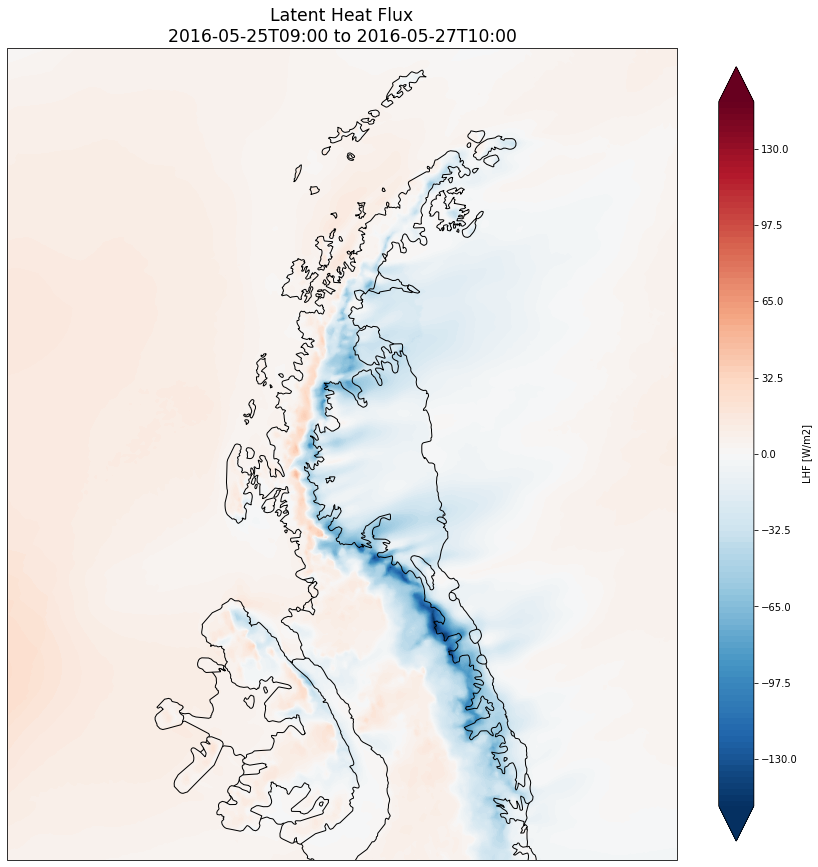

In [9]:
# [-------- EDIT THIS SECTION --------]
# Set the appropriate data file name and variable name using the above reference
data_file_name = 'latf.KNMI-2011.XPEN055.ERAINx_RACMO2.4.3H.nc_201605.nc'
variable_name = 'latf'

# set the plot and colorbar titles
plot_title = 'Latent Heat Flux'
colorbar_label = 'LHF [W/m2]'

# set the min and max values of your plot, as well as the contour interval
# experiment with these to get a good looking plot
# these are numerical values not in quotes
min_plot_value = -150 
max_plot_value = 150
contour_interval = 2.5

# choose a color map from https://matplotlib.org/stable/tutorials/colors/colormaps.html
# ** for LHF/SHF terms use a diverging color map and set the min/max values so that 0 is in the middle (i.e., a neutral color) **
# ** for these, I recommend RdBu, but reversed so that positive (warming) fluxes are red and negative (cooling) fluxes are blue **
colormap_name = 'RdBu'
reverse_colormap = True # True or False (must be capitalized and not in quotes)

# [-------- GENERALLY NO NEED TO EDIT BELOW--------]

# Read NetCDF, select variable, and take temporal mean over time of interest 
dataFolder = './Data/'
ds = xr.open_dataset(dataFolder + data_file_name)
var = ds[variable_name].squeeze() # squeeze gets rid of unncessary single-dimension coordinates (here: height)
data = var.sel(time=slice(starttime, endtime)).mean('time') # select the variable from the dataset over just the interval of interest, then take mean over the time dimension

# add a line here to scale the data field in some way (e.g., to convert units), e.g.,:
# data = data * 60 * 60 * 3 # [convert kg m-2 s-1 to kg m-2 hr-1]

# Set up a plot: size, projection, and geographic extent. 
plt.figure(figsize=(15,15))
ax = plt.subplot(projection=ccrs.Stereographic(central_longitude=-45, central_latitude=-75))
ax.set_extent([-72,-52,-73,-62], ccrs.PlateCarree())

# This is some extra code that deals with rotated pole projection of RACMO
# Defines a Cartopy coordinate reference system for the data 
rlon = ds.rlon.values
rlat = ds.rlat.values
racmoCRS = ccrs.RotatedPole(pole_longitude=ds.rotated_pole.grid_north_pole_longitude,
                            pole_latitude=ds.rotated_pole.grid_north_pole_latitude)

# This will set the minimum and maximum values on your plot: min, max, contour interval
clevs = np.arange(min_plot_value,max_plot_value+1,contour_interval)

# deal with colormap reversal, if set to True
if reverse_colormap:
    colormap_name = colormap_name + '_r' 
    
# Plot data 
result = ax.contourf(rlon, rlat, data, clevs, extend='both', cmap=colormap_name, transform=racmoCRS)

# add coastlines 
ax.coastlines(resolution='10m')
ax.add_feature(cfe.NaturalEarthFeature('physical', 'antarctic_ice_shelves_lines', '10m', edgecolor='k', facecolor='none'))

# This sets the colorbar info. Set the label here appropriate to the variable you're plotting.
plt.colorbar(result, orientation='vertical', label=colorbar_label, shrink=0.95, pad=0.05)

# This sets the title of the plot.
ax.set_title(plot_title + '\n' + starttime + ' to ' + endtime, size='xx-large')

# show the plot
plt.savefig('./Figures/'+'aws18_fohn_event_'+variable_name+'.png', dpi=300)
plt.show()

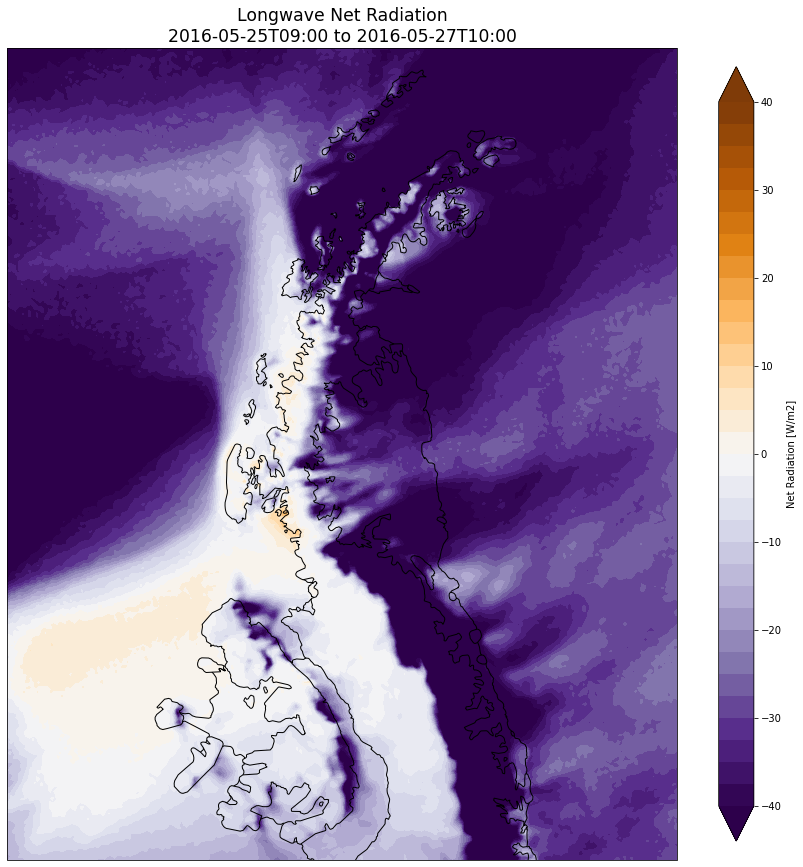

In [40]:
# [-------- EDIT THIS SECTION --------]
# Set the appropriate data file name and variable name using the above reference
data_file_name = 'lwsn.KNMI-2011.XPEN055.ERAINx_RACMO2.4.3H.nc_201605.nc'
variable_name = 'lwsn'

# set the plot and colorbar titles
plot_title = 'Longwave Net Radiation'
colorbar_label = 'Net Radiation [W/m2]'

# set the min and max values of your plot, as well as the contour interval
# experiment with these to get a good looking plot
# these are numerical values not in quotes
min_plot_value = -40 
max_plot_value = 40
contour_interval = 2.5

# choose a color map from https://matplotlib.org/stable/tutorials/colors/colormaps.html
# ** for LHF/SHF terms use a diverging color map and set the min/max values so that 0 is in the middle (i.e., a neutral color) **
# ** for these, I recommend RdBu, but reversed so that positive (warming) fluxes are red and negative (cooling) fluxes are blue **
colormap_name = 'PuOr'
reverse_colormap = True # True or False (must be capitalized and not in quotes)

# [-------- GENERALLY NO NEED TO EDIT BELOW--------]

# Read NetCDF, select variable, and take temporal mean over time of interest 
dataFolder = './Data/'
ds = xr.open_dataset(dataFolder + data_file_name)
var = ds[variable_name].squeeze() # squeeze gets rid of unncessary single-dimension coordinates (here: height)
data = var.sel(time=slice(starttime, endtime)).mean('time') # select the variable from the dataset over just the interval of interest, then take mean over the time dimension

# add a line here to scale the data field in some way (e.g., to convert units), e.g.,:
# data = data * 60 * 60 * 3 # [convert kg m-2 s-1 to kg m-2 hr-1]

# Set up a plot: size, projection, and geographic extent. 
plt.figure(figsize=(15,15))
ax = plt.subplot(projection=ccrs.Stereographic(central_longitude=-45, central_latitude=-75))
ax.set_extent([-72,-52,-73,-62], ccrs.PlateCarree())

# This is some extra code that deals with rotated pole projection of RACMO
# Defines a Cartopy coordinate reference system for the data 
rlon = ds.rlon.values
rlat = ds.rlat.values
racmoCRS = ccrs.RotatedPole(pole_longitude=ds.rotated_pole.grid_north_pole_longitude,
                            pole_latitude=ds.rotated_pole.grid_north_pole_latitude)

# This will set the minimum and maximum values on your plot: min, max, contour interval
clevs = np.arange(min_plot_value,max_plot_value+1,contour_interval)

# deal with colormap reversal, if set to True
if reverse_colormap:
    colormap_name = colormap_name + '_r' 
    
# Plot data 
result = ax.contourf(rlon, rlat, data, clevs, extend='both', cmap=colormap_name, transform=racmoCRS)

# add coastlines 
ax.coastlines(resolution='10m')
ax.add_feature(cfe.NaturalEarthFeature('physical', 'antarctic_ice_shelves_lines', '10m', edgecolor='k', facecolor='none'))

# This sets the colorbar info. Set the label here appropriate to the variable you're plotting.
plt.colorbar(result, orientation='vertical', label=colorbar_label, shrink=0.95, pad=0.05)

# This sets the title of the plot.
ax.set_title(plot_title + '\n' + starttime + ' to ' + endtime, size='xx-large')

# show the plot
plt.savefig('./Figures/'+'aws18_fohn_event_'+variable_name+'.png', dpi=300)
plt.show()

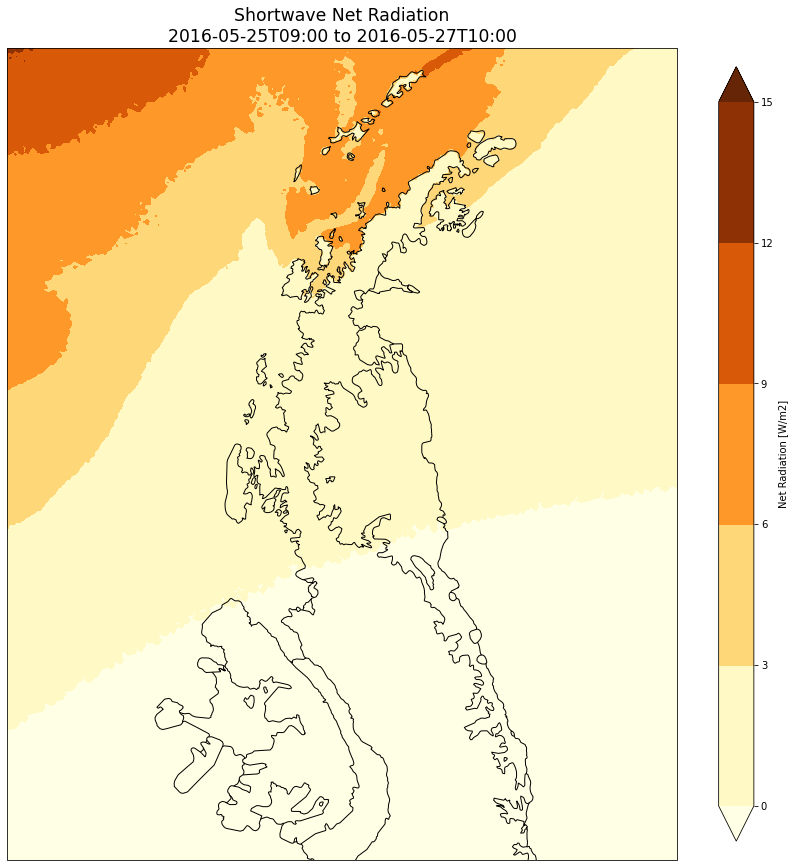

In [37]:
# [-------- EDIT THIS SECTION --------]
# Set the appropriate data file name and variable name using the above reference
data_file_name = 'swsn.KNMI-2011.XPEN055.ERAINx_RACMO2.4.3H.nc_201605.nc'
variable_name = 'swsn'

# set the plot and colorbar titles
plot_title = 'Shortwave Net Radiation'
colorbar_label = 'Net Radiation [W/m2]'

# set the min and max values of your plot, as well as the contour interval
# experiment with these to get a good looking plot
# these are numerical values not in quotes
min_plot_value = 0 
max_plot_value = 15
contour_interval = 3

# choose a color map from https://matplotlib.org/stable/tutorials/colors/colormaps.html
# ** for LHF/SHF terms use a diverging color map and set the min/max values so that 0 is in the middle (i.e., a neutral color) **
# ** for these, I recommend RdBu, but reversed so that positive (warming) fluxes are red and negative (cooling) fluxes are blue **
colormap_name = 'YlOrBr'
reverse_colormap = False # True or False (must be capitalized and not in quotes)

# [-------- GENERALLY NO NEED TO EDIT BELOW--------]

# Read NetCDF, select variable, and take temporal mean over time of interest 
dataFolder = './Data/'
ds = xr.open_dataset(dataFolder + data_file_name)
var = ds[variable_name].squeeze() # squeeze gets rid of unncessary single-dimension coordinates (here: height)
data = var.sel(time=slice(starttime, endtime)).mean('time') # select the variable from the dataset over just the interval of interest, then take mean over the time dimension

# add a line here to scale the data field in some way (e.g., to convert units), e.g.,:
# data = data * 60 * 60 * 3 # [convert kg m-2 s-1 to kg m-2 hr-1]

# Set up a plot: size, projection, and geographic extent. 
plt.figure(figsize=(15,15))
ax = plt.subplot(projection=ccrs.Stereographic(central_longitude=-45, central_latitude=-75))
ax.set_extent([-72,-52,-73,-62], ccrs.PlateCarree())

# This is some extra code that deals with rotated pole projection of RACMO
# Defines a Cartopy coordinate reference system for the data 
rlon = ds.rlon.values
rlat = ds.rlat.values
racmoCRS = ccrs.RotatedPole(pole_longitude=ds.rotated_pole.grid_north_pole_longitude,
                            pole_latitude=ds.rotated_pole.grid_north_pole_latitude)

# This will set the minimum and maximum values on your plot: min, max, contour interval
clevs = np.arange(min_plot_value,max_plot_value+1,contour_interval)

# deal with colormap reversal, if set to True
if reverse_colormap:
    colormap_name = colormap_name + '_r' 
    
# Plot data 
result = ax.contourf(rlon, rlat, data, clevs, extend='both', cmap=colormap_name, transform=racmoCRS)

# add coastlines 
ax.coastlines(resolution='10m')
ax.add_feature(cfe.NaturalEarthFeature('physical', 'antarctic_ice_shelves_lines', '10m', edgecolor='k', facecolor='none'))

# This sets the colorbar info. Set the label here appropriate to the variable you're plotting.
plt.colorbar(result, orientation='vertical', label=colorbar_label, shrink=0.95, pad=0.05)

# This sets the title of the plot.
ax.set_title(plot_title + '\n' + starttime + ' to ' + endtime, size='xx-large')

# show the plot
plt.savefig('./Figures/'+'aws18_fohn_event_'+variable_name+'.png', dpi=300)
plt.show()

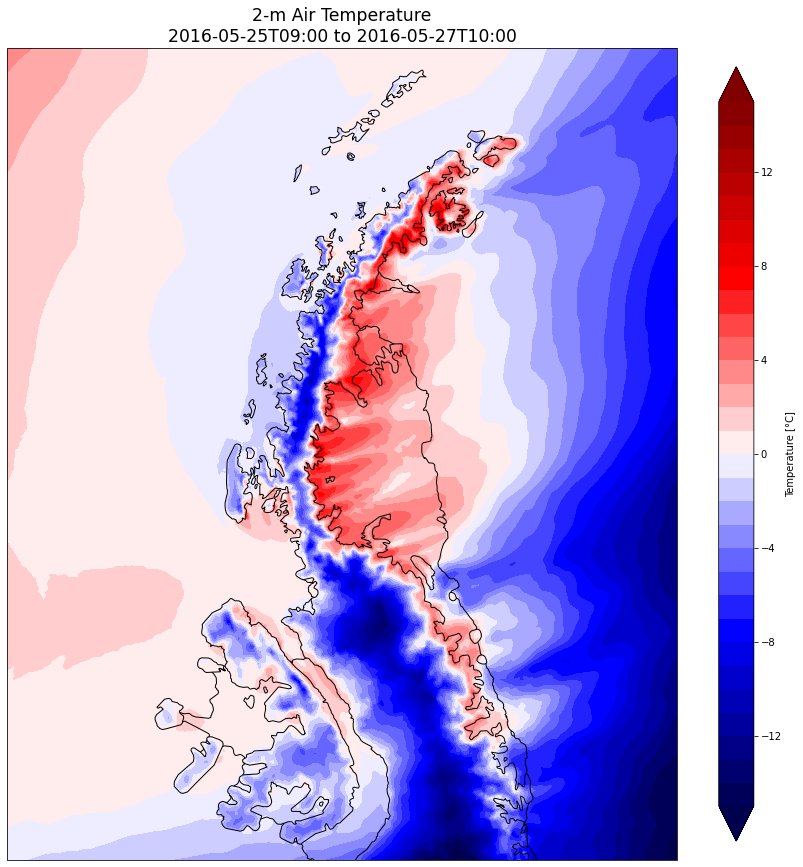

In [15]:
# [-------- EDIT THIS SECTION --------]
# Set the appropriate data file name and variable name using the above reference
data_file_name = 't2m.KNMI-2011.XPEN055.ERAINx_RACMO2.4.3H.nc_201605.nc'
variable_name = 't2m'

# set the plot and colorbar titles
plot_title = '2-m Air Temperature'
colorbar_label = 'Temperature [°C]'

# set the min and max values of your plot, as well as the contour interval
# experiment with these to get a good looking plot
# these are numerical values not in quotes
min_plot_value = -15 
max_plot_value = 15
contour_interval = 1

# choose a color map from https://matplotlib.org/stable/tutorials/colors/colormaps.html
# ** for LHF/SHF terms use a diverging color map and set the min/max values so that 0 is in the middle (i.e., a neutral color) **
# ** for these, I recommend RdBu, but reversed so that positive (warming) fluxes are red and negative (cooling) fluxes are blue **
colormap_name = 'seismic'
reverse_colormap = False # True or False (must be capitalized and not in quotes)

# [-------- GENERALLY NO NEED TO EDIT BELOW--------]

# Read NetCDF, select variable, and take temporal mean over time of interest 
dataFolder = './Data/'
ds = xr.open_dataset(dataFolder + data_file_name)
var = ds[variable_name].squeeze() # squeeze gets rid of unncessary single-dimension coordinates (here: height)
data = var.sel(time=slice(starttime, endtime)).mean('time') # select the variable from the dataset over just the interval of interest, then take mean over the time dimension

# add a line here to scale the data field in some way (e.g., to convert units), e.g.,:
# data = data * 60 * 60 * 3 # [convert kg m-2 s-1 to kg m-2 hr-1]
data = data-273.15

# Set up a plot: size, projection, and geographic extent. 
plt.figure(figsize=(15,15))
ax = plt.subplot(projection=ccrs.Stereographic(central_longitude=-45, central_latitude=-75))
ax.set_extent([-72,-52,-73,-62], ccrs.PlateCarree())

# This is some extra code that deals with rotated pole projection of RACMO
# Defines a Cartopy coordinate reference system for the data 
rlon = ds.rlon.values
rlat = ds.rlat.values
racmoCRS = ccrs.RotatedPole(pole_longitude=ds.rotated_pole.grid_north_pole_longitude,
                            pole_latitude=ds.rotated_pole.grid_north_pole_latitude)

# This will set the minimum and maximum values on your plot: min, max, contour interval
clevs = np.arange(min_plot_value,max_plot_value+1,contour_interval)

# deal with colormap reversal, if set to True
if reverse_colormap:
    colormap_name = colormap_name + '_r' 
    
# Plot data 
result = ax.contourf(rlon, rlat, data, clevs, extend='both', cmap=colormap_name, transform=racmoCRS)

# add coastlines 
ax.coastlines(resolution='10m')
ax.add_feature(cfe.NaturalEarthFeature('physical', 'antarctic_ice_shelves_lines', '10m', edgecolor='k', facecolor='none'))

# This sets the colorbar info. Set the label here appropriate to the variable you're plotting.
plt.colorbar(result, orientation='vertical', label=colorbar_label, shrink=0.95, pad=0.05)

# This sets the title of the plot.
ax.set_title(plot_title + '\n' + starttime + ' to ' + endtime, size='xx-large')

# show the plot
plt.savefig('./Figures/'+'aws18_fohn_event_'+variable_name+'.png', dpi=300)
plt.show()

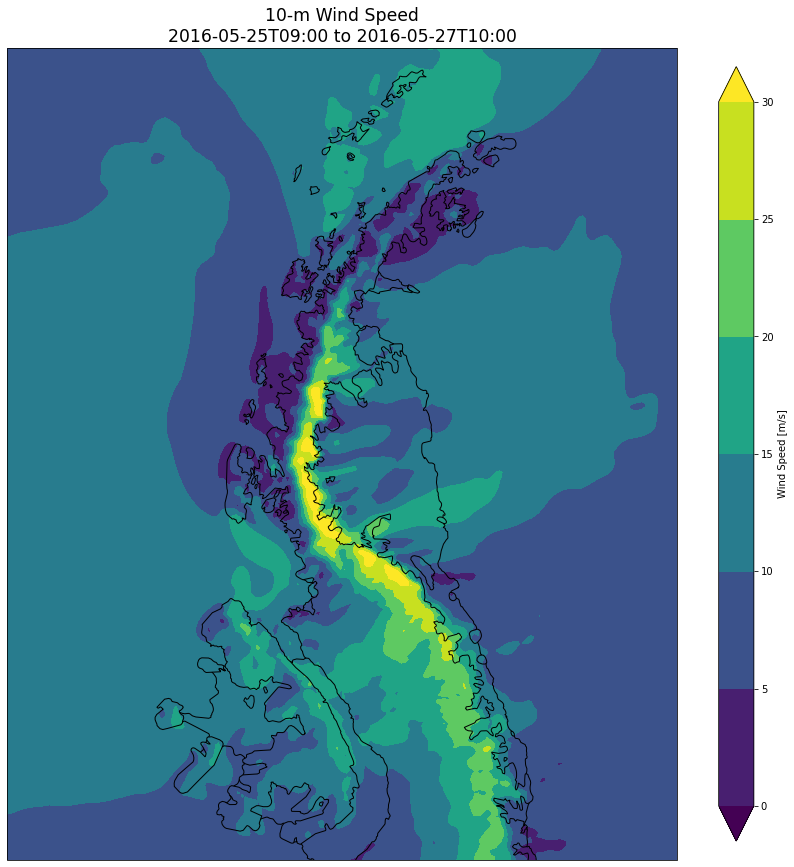

In [33]:
# [-------- EDIT THIS SECTION --------]
# Set the appropriate data file name and variable name using the above reference
data_file_name = 'ff10m.KNMI-2011.XPEN055.ERAINx_RACMO2.4.3H.nc_201605.nc'
variable_name = 'ff10m'

# set the plot and colorbar titles
plot_title = '10-m Wind Speed'
colorbar_label = 'Wind Speed [m/s]'

# set the min and max values of your plot, as well as the contour interval
# experiment with these to get a good looking plot
# these are numerical values not in quotes
min_plot_value = 0 
max_plot_value = 30
contour_interval = 5

# choose a color map from https://matplotlib.org/stable/tutorials/colors/colormaps.html
# ** for LHF/SHF terms use a diverging color map and set the min/max values so that 0 is in the middle (i.e., a neutral color) **
# ** for these, I recommend RdBu, but reversed so that positive (warming) fluxes are red and negative (cooling) fluxes are blue **
colormap_name = 'viridis'
reverse_colormap = False # True or False (must be capitalized and not in quotes)

# [-------- GENERALLY NO NEED TO EDIT BELOW--------]

# Read NetCDF, select variable, and take temporal mean over time of interest 
dataFolder = './Data/'
ds = xr.open_dataset(dataFolder + data_file_name)
var = ds[variable_name].squeeze() # squeeze gets rid of unncessary single-dimension coordinates (here: height)
data = var.sel(time=slice(starttime, endtime)).mean('time') # select the variable from the dataset over just the interval of interest, then take mean over the time dimension

# add a line here to scale the data field in some way (e.g., to convert units), e.g.,:
# data = data * 60 * 60 * 3 # [convert kg m-2 s-1 to kg m-2 hr-1]

# Set up a plot: size, projection, and geographic extent. 
plt.figure(figsize=(15,15))
ax = plt.subplot(projection=ccrs.Stereographic(central_longitude=-45, central_latitude=-75))
ax.set_extent([-72,-52,-73,-62], ccrs.PlateCarree())

# This is some extra code that deals with rotated pole projection of RACMO
# Defines a Cartopy coordinate reference system for the data 
rlon = ds.rlon.values
rlat = ds.rlat.values
racmoCRS = ccrs.RotatedPole(pole_longitude=ds.rotated_pole.grid_north_pole_longitude,
                            pole_latitude=ds.rotated_pole.grid_north_pole_latitude)

# This will set the minimum and maximum values on your plot: min, max, contour interval
clevs = np.arange(min_plot_value,max_plot_value+1,contour_interval)

# deal with colormap reversal, if set to True
if reverse_colormap:
    colormap_name = colormap_name + '_r' 
    
# Plot data 
result = ax.contourf(rlon, rlat, data, clevs, extend='both', cmap=colormap_name, transform=racmoCRS)

# add coastlines 
ax.coastlines(resolution='10m')
ax.add_feature(cfe.NaturalEarthFeature('physical', 'antarctic_ice_shelves_lines', '10m', edgecolor='k', facecolor='none'))

# This sets the colorbar info. Set the label here appropriate to the variable you're plotting.
plt.colorbar(result, orientation='vertical', label=colorbar_label, shrink=0.95, pad=0.05)

# This sets the title of the plot.
ax.set_title(plot_title + '\n' + starttime + ' to ' + endtime, size='xx-large')

# show the plot
plt.savefig('./Figures/'+'aws18_fohn_event_'+variable_name+'.png', dpi=300)
plt.show()

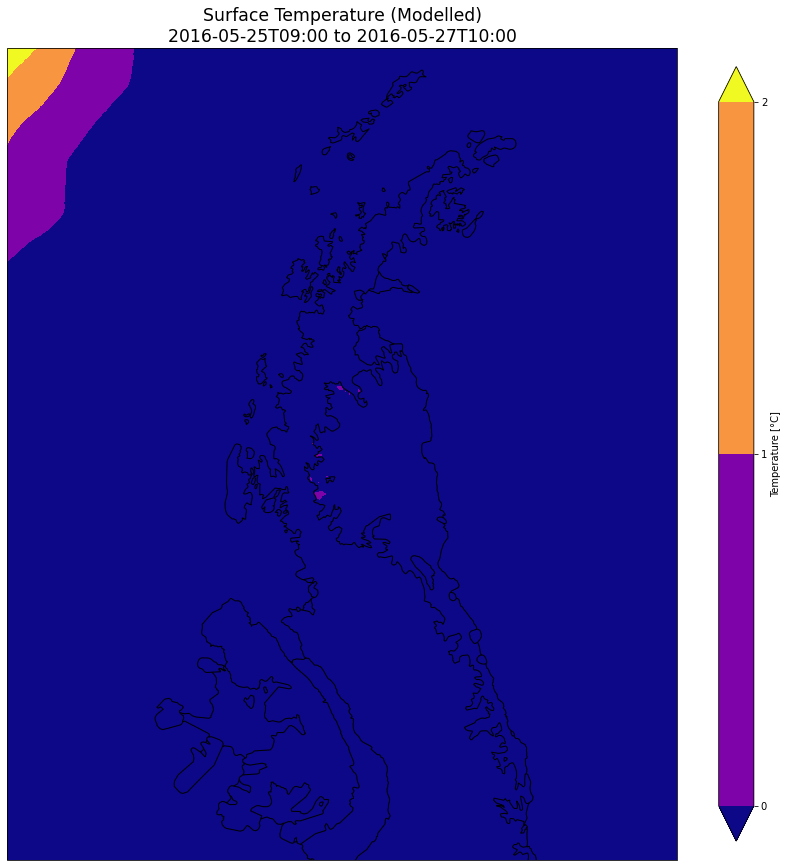

In [48]:
# [-------- EDIT THIS SECTION --------]
# Set the appropriate data file name and variable name using the above reference
data_file_name = 'tskin.KNMI-2011.XPEN055.ERAINx_RACMO2.4.3H.nc_201605.nc'
variable_name = 'tskin'

# set the plot and colorbar titles
plot_title = 'Surface Temperature (Modelled)'
colorbar_label = 'Temperature [°C]'

# set the min and max values of your plot, as well as the contour interval
# experiment with these to get a good looking plot
# these are numerical values not in quotes
min_plot_value = 0 
max_plot_value = 2
contour_interval = 1

# choose a color map from https://matplotlib.org/stable/tutorials/colors/colormaps.html
# ** for LHF/SHF terms use a diverging color map and set the min/max values so that 0 is in the middle (i.e., a neutral color) **
# ** for these, I recommend RdBu, but reversed so that positive (warming) fluxes are red and negative (cooling) fluxes are blue **
colormap_name = 'plasma'
reverse_colormap = False # True or False (must be capitalized and not in quotes)

# [-------- GENERALLY NO NEED TO EDIT BELOW--------]

# Read NetCDF, select variable, and take temporal mean over time of interest 
dataFolder = './Data/'
ds = xr.open_dataset(dataFolder + data_file_name)
var = ds[variable_name].squeeze() # squeeze gets rid of unncessary single-dimension coordinates (here: height)
data = var.sel(time=slice(starttime, endtime)).mean('time') # select the variable from the dataset over just the interval of interest, then take mean over the time dimension

# add a line here to scale the data field in some way (e.g., to convert units), e.g.,:
# data = data * 60 * 60 * 3 # [convert kg m-2 s-1 to kg m-2 hr-1]
data = data-273.15

# Set up a plot: size, projection, and geographic extent. 
plt.figure(figsize=(15,15))
ax = plt.subplot(projection=ccrs.Stereographic(central_longitude=-45, central_latitude=-75))
ax.set_extent([-72,-52,-73,-62], ccrs.PlateCarree())

# This is some extra code that deals with rotated pole projection of RACMO
# Defines a Cartopy coordinate reference system for the data 
rlon = ds.rlon.values
rlat = ds.rlat.values
racmoCRS = ccrs.RotatedPole(pole_longitude=ds.rotated_pole.grid_north_pole_longitude,
                            pole_latitude=ds.rotated_pole.grid_north_pole_latitude)

# This will set the minimum and maximum values on your plot: min, max, contour interval
clevs = np.arange(min_plot_value,max_plot_value+1,contour_interval)

# deal with colormap reversal, if set to True
if reverse_colormap:
    colormap_name = colormap_name + '_r' 
    
# Plot data 
result = ax.contourf(rlon, rlat, data, clevs, extend='both', cmap=colormap_name, transform=racmoCRS)

# add coastlines 
ax.coastlines(resolution='10m')
ax.add_feature(cfe.NaturalEarthFeature('physical', 'antarctic_ice_shelves_lines', '10m', edgecolor='k', facecolor='none'))

# This sets the colorbar info. Set the label here appropriate to the variable you're plotting.
plt.colorbar(result, orientation='vertical', label=colorbar_label, shrink=0.95, pad=0.05)

# This sets the title of the plot.
ax.set_title(plot_title + '\n' + starttime + ' to ' + endtime, size='xx-large')

# show the plot
plt.savefig('./Figures/'+'aws18_fohn_event_'+variable_name+'.png', dpi=300)
plt.show()